**In this project, I will be predicting whether written review corresponds to positive or not negative rating.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## reading the data
df_train = pd.read_csv('drive/My Drive/UCI ML Drug Review dataset/drugsComTrain_raw.csv')
df_test = pd.read_csv('drive/My Drive/UCI ML Drug Review dataset/drugsComTest_raw.csv')

In [ ]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


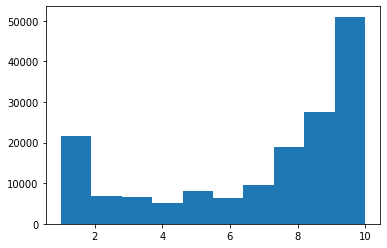

In [ ]:
## plot of rating 
plt.hist(df_train['rating']);

In [ ]:
# selecting only review and rating columns
X_train = df_train['review']
y_train = df_train['rating']
X_test = df_test['review']
y_test = df_test['rating']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# using english stop words for fature extraction of review data
vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))
X_train = vect.fit_transform(X_train.tolist())
X_test = vect.transform(X_test.tolist())

In [ ]:
## Training RandomForestClaasifier on training data
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
train_pred = classifier.predict(X_train)
test_pred = classifier.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, train_pred))
print('Testing Accuracy:', accuracy_score(y_test, test_pred))

Training Accuracy: 0.9942528379325096
Testing Accuracy: 0.7243425212959863


Model is overfiiting on training data as accuracy score for testing data is close to 72. I need to make some changes to rectify this issue.

In [ ]:
df_train['new_rating'] = df_train[(df_train['rating'] > 6) | (df_train['rating'] < 4)]['rating']
df_test['new_rating'] = df_test[(df_test['rating'] > 6) | (df_test['rating'] < 4)]['rating']

df_train['new_rating'] = df_train['new_rating'].apply(lambda x: 1 if x > 6 else 0)
df_test['new_rating'] = df_test['new_rating'].apply(lambda x: 1 if x > 6 else 0)

Neutral rating are affecting our prediction between whether the rating being positive or negative. I chose above 6 rating as positive rating and below 4 as negative rating.

In [ ]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,new_rating
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1


In [ ]:
# adopting the newer data values
X_train = df_train['review']
X_test = df_test['review']
y_train = df_train['new_rating']
y_test = df_test['new_rating']

In [ ]:
vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))
X_train = vect.fit_transform(X_train.tolist())
X_test = vect.transform(X_test.tolist())

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
train_pred = classifier.predict(X_train)
test_pred = classifier.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, train_pred))
print('Testing Accuracy:', accuracy_score(y_test, test_pred))

Training Accuracy: 0.9972907121645164
Testing Accuracy: 0.8935758657887884


Accuracy for testing data increased drastically in the newer rating and review system. We can vary n_estimators for a better result.

In [ ]:
## choosing different n_estimators for our model
n_estimators = np.array([10, 20, 30, 40, 50])

train_accu = []
test_accu = []

for n_estimator in n_estimators:
    classifier = RandomForestClassifier(n_estimators = n_estimator, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    
    train_accu.append(accuracy_score(y_train, train_pred))
    test_accu.append(accuracy_score(y_test, test_pred))

print('Training Accuracies')
print(train_accu)
print('Testing Accuracies')
print(test_accu)

Training Accuracies
[0.9972907121645164, 0.9992126325970104, 0.9995598182235256, 0.9996590141168156, 0.9996652138601462]
Testing Accuracies
[0.8935758657887884, 0.9048283301714838, 0.9069114310158837, 0.9079343823234014, 0.9082877655023621]


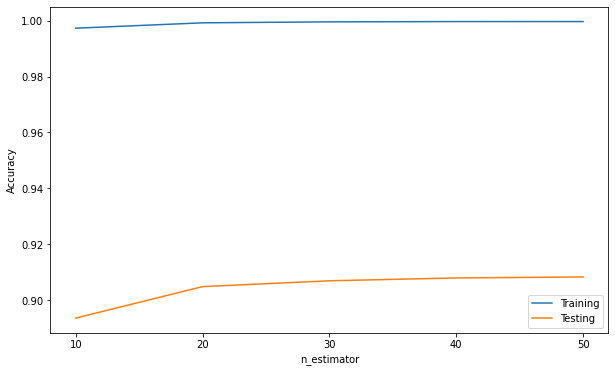

In [ ]:
## plotting the change in training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(n_estimators))),train_accu, label='Training');
plt.plot(list(range(len(n_estimators))), test_accu, label='Testing');
plt.xticks(list(range(len(n_estimators))), n_estimators);
plt.xlabel('n_estimator');
plt.ylabel('Accuracy')
plt.legend();